In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import shutup
shutup.please()


In [2]:
def make_graph(ax, data, color=None):
    x = data["x"]
    y = data["y"]
    name = data["name"]

    ax.scatter(x, y, color=color)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_title(f"Dataset: {name}")  # title for text-book

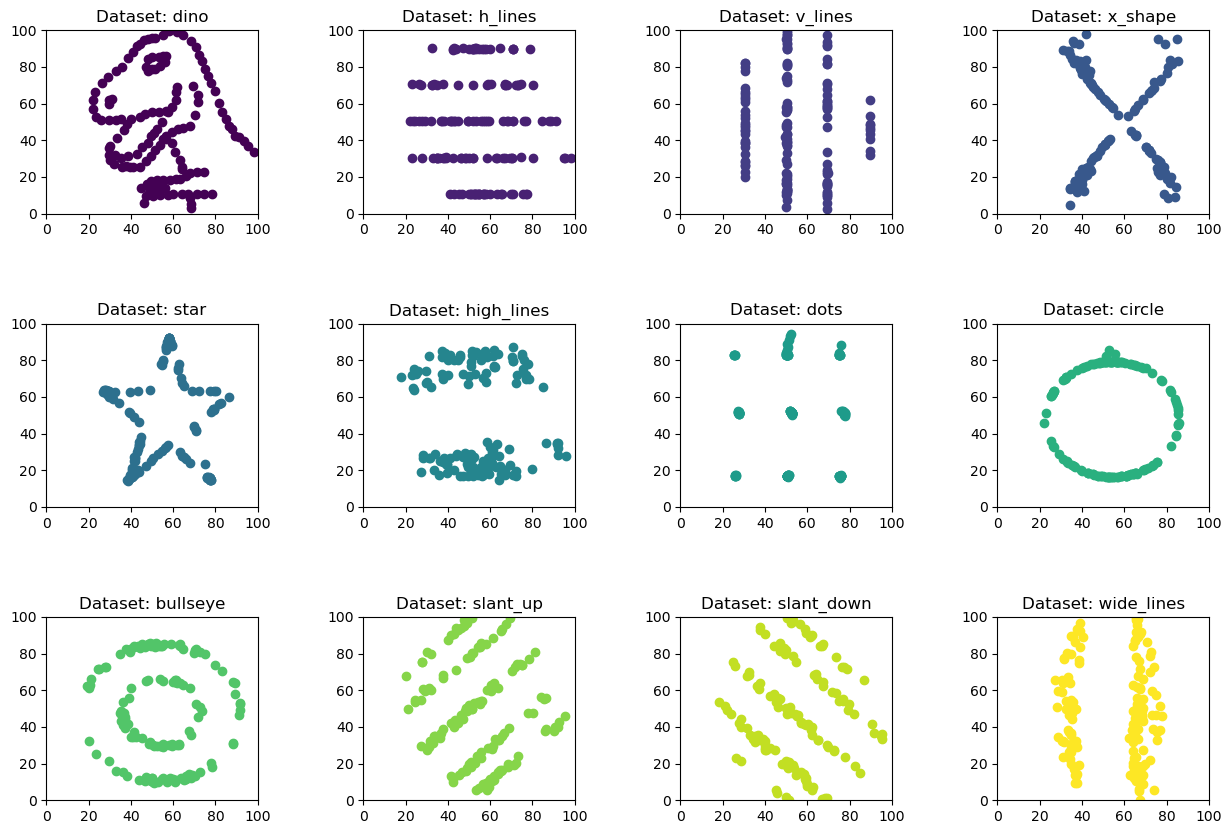

In [3]:
df = pd.read_csv('DatasaurusDozen.csv')
grouped = df.groupby(df.columns[0])

dataset_names = [
    "dino",
    "h_lines",
    "v_lines",
    "x_shape",
    "star",
    "high_lines",
    "dots",
    "circle",
    "bullseye",
    "slant_up",
    "slant_down",
    "wide_lines",
]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axs = []
for row in axes:
    for ax in row:
        axs.append(ax)


color_map = plt.cm.get_cmap(lut=12)
plt.subplots_adjust(wspace=0.5, hspace=0.6)

for i, name in enumerate(dataset_names):
    #print(name)
    name_index = df["dataset"] == name
    data_df = df[name_index]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1, 1)
    y = data_df["y"].values.reshape(-1, 1)

    data = {"x": x, "y": y, "name": name}
    diagrams = ripser(data_df.loc[:, data_df.columns!='dataset'])['dgms']
    
    ax = axs[i]
  
    make_graph(ax, data, color=color_map(i))


    mean_x = data_df["x"].to_numpy().mean()
    mean_y = data_df["y"].to_numpy().mean()
    #print(data_df[["x", "y"]].agg(["count", "mean", "var"]).applymap(lambda x: f'{x:.2f}'), end="\n\n")



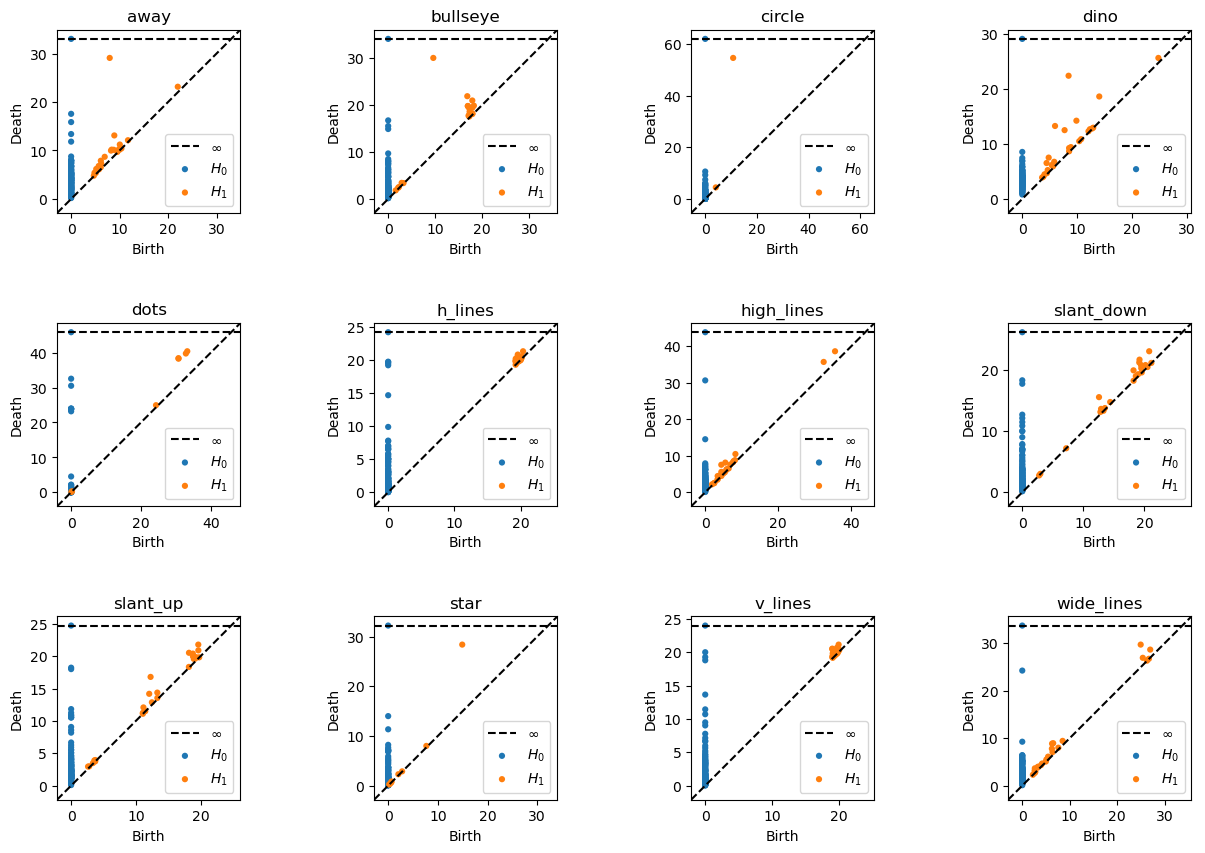

In [5]:
fig, axs = plt.subplots(3,4, figsize=(15, 10))  # 3 rows, 4 columns
plt.subplots_adjust(wspace=0.5, hspace=0.6)
for ax, (group_name, group_df) in zip(axs.flatten(), grouped):
    diagrams = ripser(group_df.loc[:, df.columns!='dataset'])['dgms']
    plot_diagrams(diagrams, ax=ax)
    ax.set_title(group_name)
plt.show()

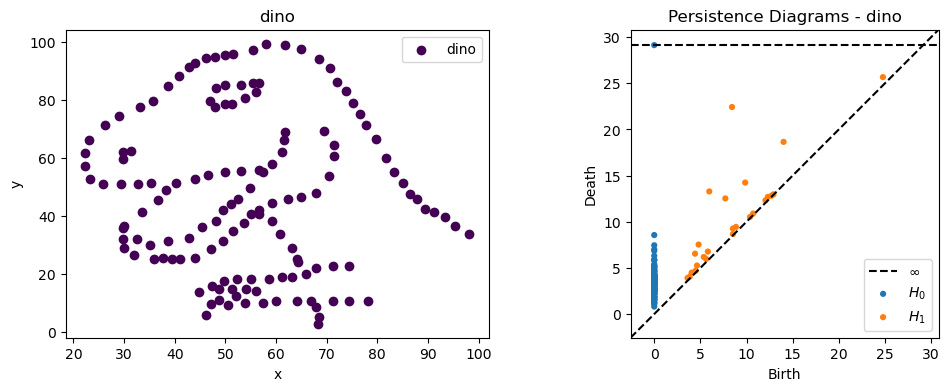

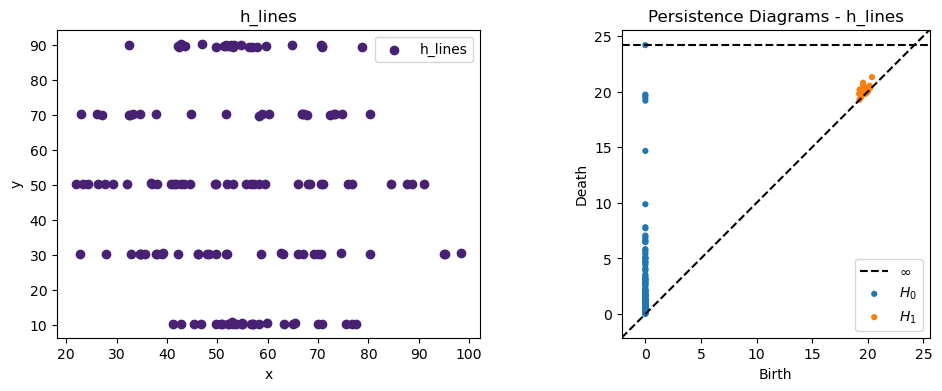

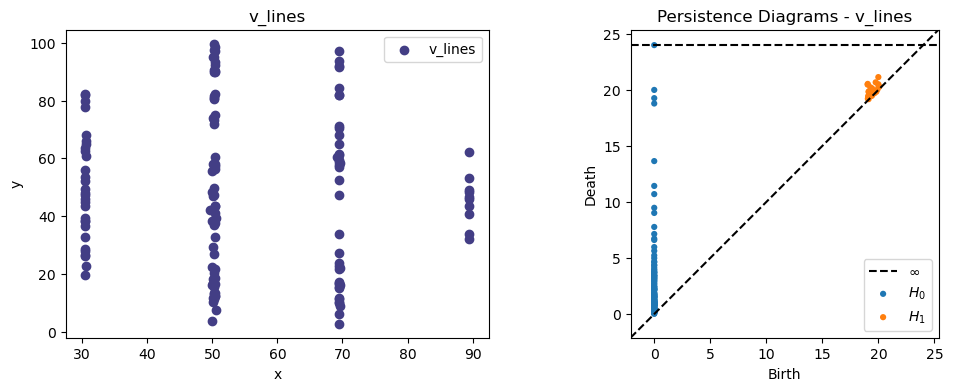

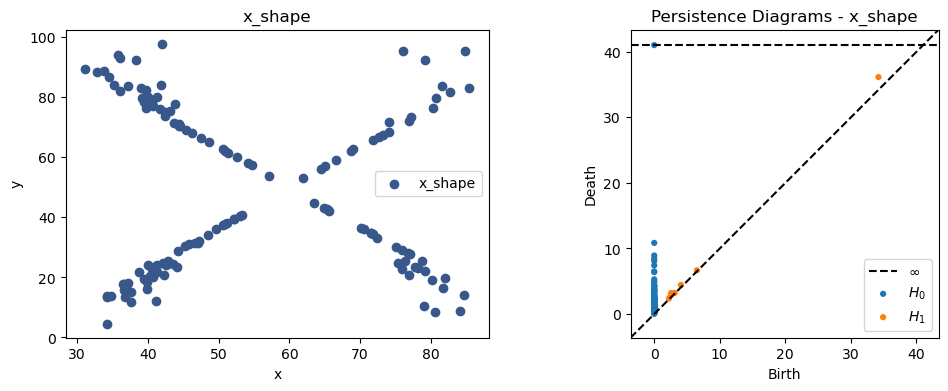

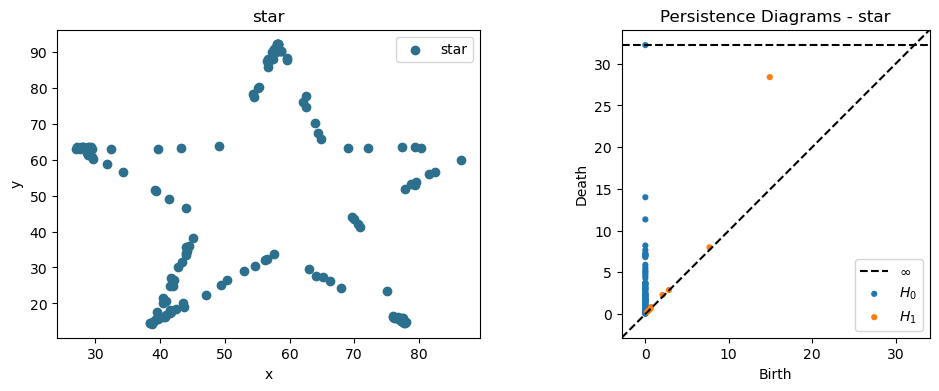

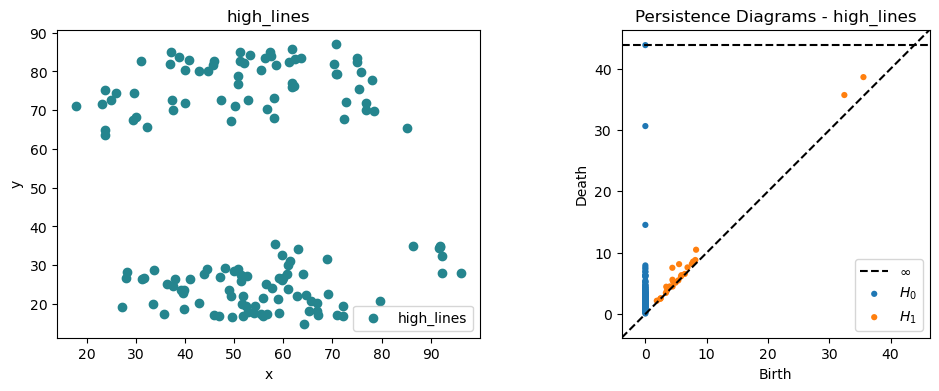

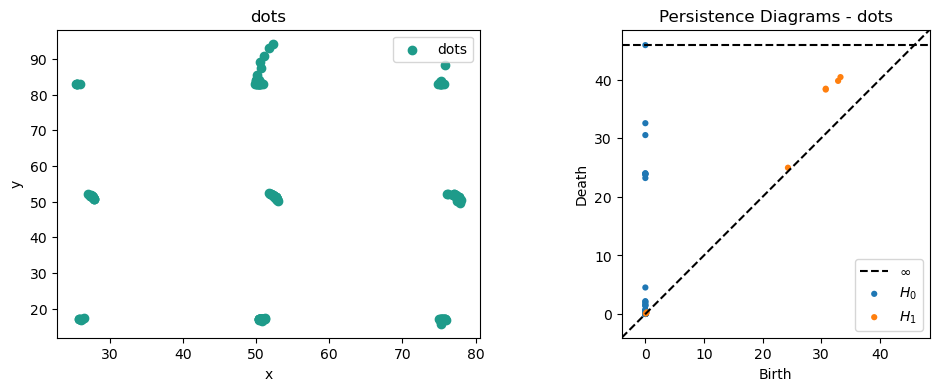

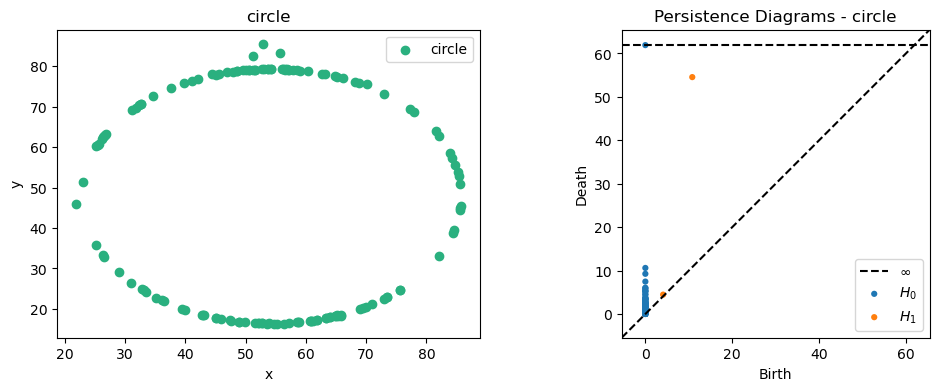

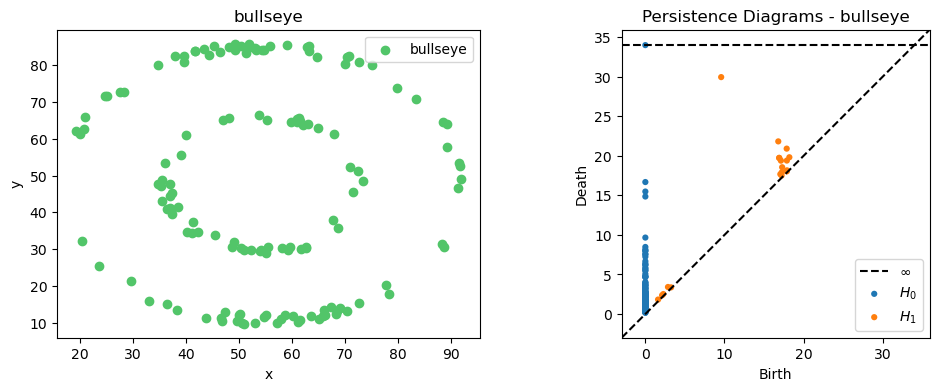

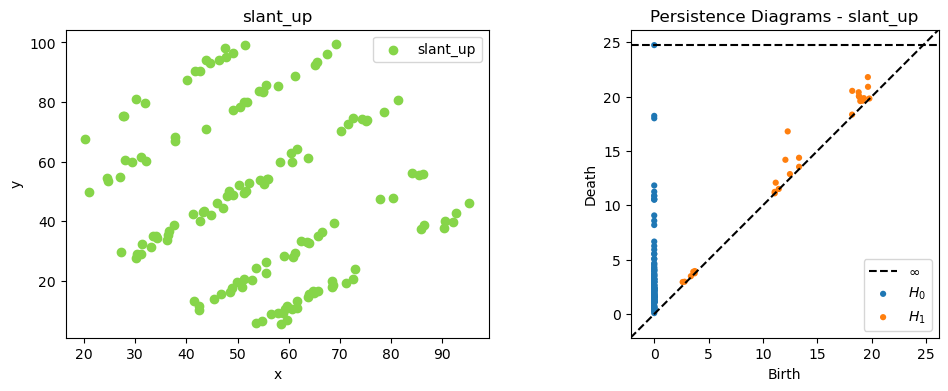

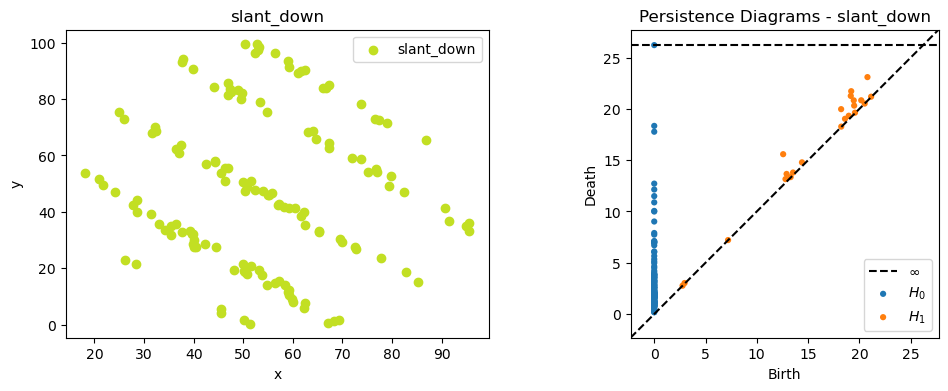

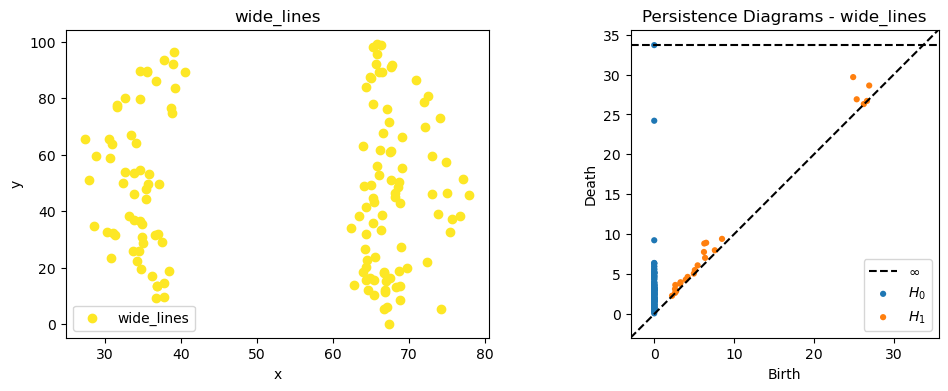

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
df = pd.read_csv('DatasaurusDozen.csv')
grouped = df.groupby(df.columns[0])

dataset_names = [
    "dino",
    "h_lines",
    "v_lines",
    "x_shape",
    "star",
    "high_lines",
    "dots",
    "circle",
    "bullseye",
    "slant_up",
    "slant_down",
    "wide_lines",
]

color_map = plt.cm.get_cmap(lut=12)

for name in dataset_names:
    data_df = df[df["dataset"] == name]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"]
    y = data_df["y"]

    # Create a new plot for each dataset
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create subplots with 1 row and 2 columns
    axs[0].scatter(x, y, c=color_map(dataset_names.index(name)), label=name)  # Plot scatter in the first subplot
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].set_title(name)
    axs[0].legend()

    # Compute persistence diagrams
    diagrams = ripser(data_df.loc[:, data_df.columns != 'dataset'])['dgms']

    # Plot persistence diagrams in the second subplot
    plot_diagrams(diagrams, ax=axs[1])
    axs[1].set_title(f"Persistence Diagrams - {name}")

    plt.show()